# Import
- df, original dataframe
- dfg, world bank gdp per cap data
- dfl, world bank life expectancy data
- dfp, world bank population data

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.offline as py
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


path = r'/Users/amritambe/Desktop/Analysis_Project/Women_Empowerment'
df = pd.read_csv(os.path.join(path, '2 Data', 'Clean_Data', '12_02_2023_Kmeans_WEI.csv'), index_col='Unnamed: 0')
dfg = pd.read_csv(os.path.join(path, '2 Data', 'World_Bank', 'API_NY.GDP.PCAP.CD_DS2_en_csv_v2_6298251.csv'), skiprows=4)
dfl = pd.read_csv(os.path.join(path, '2 Data', 'World_Bank', 'API_SP.DYN.LE00.IN_DS2_en_csv_v2_6297711.csv'), skiprows=4)
dfp = pd.read_csv(os.path.join(path, '2 Data', 'World_Bank', 'API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv'), skiprows=4)


print('Data Imported:\n')
dfg.head()

Data Imported:



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6283.001443,7567.253642,9274.514156,10767.396220,11638.733706,12850.215712,13657.670644,14970.152342,16675.278488,17140.433369,17375.225306,18713.425388,19742.316739,19833.826746,21026.167091,20911.192767,21375.269123,22050.589873,24105.524121,24978.221674,25832.925565,27665.299480,29011.639057,25740.770230,24452.588739,26043.156325,25611.175767,26514.868980,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,141.385955,144.342434,148.774835,157.047580,166.849791,177.769086,186.630486,199.559835,210.078097,229.711026,243.158263,258.700523,270.761172,345.573458,412.830995,426.300936,414.469756,447.927785,485.666382,560.175749,720.771507,729.912432,668.797687,692.732222,625.466636,506.816677,555.611326,655.891188,702.320061,725.869675,821.817304,865.255505,734.738293,710.176421,700.189236,766.165631,741.056263,762.894348,700.224696,673.520993,710.665706,631.595695,631.928282,818.121921,991.192169,1126.375948,1232.423412,1376.638778,1435.808451,1420.293773,1656.366272,1806.768778,1773.651568,1736.849038,1725.332959,1554.167299,1444.003514,1625.286236,1558.307482,1507.982881,1355.805923,1545.613215,1644.062829,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,134.250360,162.642175,166.224831,141.365322,149.744068,181.598776,194.669036,205.674097,232.778699,255.045622,284.755532,291.649791,311.853617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.174037,199.643228,221.830531,254.115274,274.015394,376.318296,382.533804,453.387382,562.499219,608.738856,653.417479,638.733185,626.512930,566.881133,523.053012,526.140801,492.090632,497.741429,512.055098,355.777826,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.053706,112.128417,117.814663,122.370114,130.700278,137.301801,143.012562,127.325268,128.366811,142.327523,193.576278,167.637045,198.403376,243.875530,330.078714,374.015474,439.832147,450.074086,477.194017,577.541556,709.848877,1299.911318,1120.594020,805.033534,649.025771,644.343875,578.865282,578.117585,555.926365,505.333080,589.165831,602.994289,562.362464,571.882781,579.701872,872.067327,1078.702831,1103.186661,1154.479523,523.224236,519.757395,532.272576,619.712652,697.851236,841.297352,1000.793722,1243.173889,1421.272934,1685.556069,1467.615875,1679.887830,1861.381068,1957.917784,2154.150832,2248.316255,1882.264038,1648.762676,1590.277754,1735.374911,1812.446822,1688.075575,1766.943618,1785.312219,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712.369763,643.439974,620.736572,623.909304,637.903551,758.088489,684.901344,756.427545,793.391428,892.340076,949.921356,850.556180,657.654640,466.679163,329.691784,398.120223,454.375004,516.127849,423.403332,387.689415,556.884244,527.464118,872.657638,982.805590,1254.696126,1900.723816,2597.963585,3121.348735,4081.717497,3123.698898,3586.663680,4608.155166,5083.826851,5061.349240,5011.984412,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231,NaN


In [2]:
dfl.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,67.168000,67.583000,67.975000,68.577000,69.092000,69.503000,69.762000,70.035000,70.264000,70.494000,70.778000,71.066000,71.722000,71.959000,72.105000,72.251000,72.388000,72.462000,72.789000,73.047000,73.023000,73.076000,73.100000,73.179000,73.225000,73.272000,73.349000,73.448000,73.452000,73.491000,73.561000,73.569000,73.647000,73.726000,73.752000,73.576000,73.811000,74.026000,74.210000,74.147000,74.560000,75.404000,75.465000,75.531000,75.636000,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,46.432303,46.718485,47.192942,46.897389,47.692317,47.598064,47.759887,48.349588,48.635905,48.763605,49.261336,49.636538,50.057073,50.296849,48.703331,48.652665,49.011631,49.639719,50.075888,49.359727,50.684100,50.607728,50.390460,49.962114,50.273628,50.882582,51.001925,50.810689,50.974231,50.325913,51.237852,51.964481,52.189648,52.540794,53.022035,53.545457,54.219651,55.150546,55.933802,56.680419,57.620852,58.411150,59.293271,60.050780,60.709870,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,36.910000,37.418000,37.923000,38.444000,39.003000,39.550000,40.100000,40.645000,41.228000,40.271000,39.086000,39.618000,40.164000,37.766000,38.187000,33.329000,33.550000,39.396000,39.844000,43.958000,45.158000,45.967000,46.663000,47.596000,51.466000,51.495000,52.544000,53.243000,53.634000,52.943000,54.846000,55.298000,55.798000,56.454000,57.344000,57.944000,58.361000,58.684000,59.111000,59.852000,60.364000,60.851000,61.419000,61.923000,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,40.350420,41.034761,41.556721,42.249793,42.855047,43.497684,44.201254,45.003163,45.719889,46.269535,46.673736,47.015239,47.297190,47.529378,47.785262,47.931920,48.021676,48.066764,48.237852,48.512913,48.689847,48.650003,48.662461,48.737266,48.832039,48.681892,48.783773,48.906277,49.079184,49.332949,49.750117,50.221954,50.565144,50.927848,51.403356,51.819132,52.344551,52.832126,53.251712,53.641165,54.159421,54.550169,55.013138,55.340561,55.673406,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,39.829000,40.190000,40.554000,40.905000,41.270000,41.652000,41.191000,41.163000,41.437000,41.830000,42.175000,42.449000,42.772000,43.051000,42.092000,42.353000,42.648000,42.843000,40.917000,41.545000,41.765000,41.893000,43.813000,42.209000,42.101000,43.422000,45.849000,46.033000,46.306000,45.057000,45.386000,46.024000,46.590000,47.386000,49.617000,50.592000,51.570000,52.369000,53.642000,54.633000,55.752000,56.726000,57.596000,58.623000,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,NaN,NaN


In [3]:
dfp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,59330.0,59106.0,58816.0,58855.0,59365.0,60028.0,60715.0,61193.0,61465.0,61738.0,62006.0,62267.0,62614.0,63116.0,63683.0,64174.0,64478.0,64553.0,64450.0,64332.0,64596.0,65712.0,67864.0,70192.0,72360.0,74710.0,77050.0,79417.0,81858.0,84355.0,86867.0,89101.0,90691.0,91781.0,92701.0,93540.0,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,167596160.0,172475766.0,177503186.0,182599092.0,187901657.0,193512956.0,199284304.0,205202669.0,211120911.0,217481420.0,224315978.0,230967858.0,237937461.0,245386717.0,252779730.0,260209149.0,267938123.0,276035920.0,284490394.0,292795186.0,301124880.0,309890664.0,318544083.0,326933522.0,335625136.0,344418362.0,353466601.0,362985802.0,372352230.0,381715600.0,391486231.0,401600588.0,412001885.0,422741118.0,433807484.0,445281555.0,457153837.0,469508516.0,482406426.0,495748900.0,509410477.0,523459657.0,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,10494489.0,10752971.0,11015857.0,11286753.0,11575305.0,11869879.0,12157386.0,12425267.0,12687301.0,12938862.0,12986369.0,12486631.0,11155195.0,10088289.0,9951449.0,10243686.0,10512221.0,10448442.0,10322758.0,10383460.0,10673168.0,10694796.0,10745167.0,12057433.0,14003760.0,15455555.0,16418912.0,17106595.0,17788819.0,18493132.0,19262847.0,19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,24411191.0,25442944.0,25903301.0,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,118615741.0,121424797.0,124336039.0,127364044.0,130563107.0,133953892.0,137548613.0,141258400.0,145122851.0,149206663.0,153459665.0,157825609.0,162323313.0,167023385.0,171566640.0,176054495.0,180817312.0,185720244.0,190759952.0,195969722.0,201392200.0,206739024.0,212172888.0,217966101.0,223788766.0,229675775.0,235861484.0,242200260.0,248713095.0,255482918.0,262397030.0,269611898.0,277160097.0,284952322.0,292977949.0,301265247.0,309824829.0,318601484.0,327612838.0,336893835.0,346475221.0,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,5928386.0,6029700.0,6177049.0,6364731.0,6578230.0,6802494.0,7032713.0,7266780.0,7511895.0,7771590.0,8043218.0,8330047.0,8631457.0,8947152.0,9276707.0,9617702.0,9970621.0,10332574.0,10694057.0,11060261.0,11439498.0,11828638.0,12228691.0,12632507.0,13038270.0,13462031.0,13912253.0,14383350.0,14871146.0,15366864.0,15870753.0,16394062.0,16941587.0,17516139.0,18124342.0,18771125.0,19450959.0,20162340.0,20909684.0,21691522.0,22507674.0,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,312735

# Define functions
- dissimilar_names()
  - tool for matching elements in different df
- plotly_groups()
  - create scatter plot
- melt_df()
  - change wide format df to long format
  - (specifically for world bank datasets)


In [4]:
#create list of not similar countries *DF COUNTRIES*

def dissimilar_names(x, y, col):
    '''
    __Generates a list of dissimilar elements in a column___
    
    x- df 1, dataframe 
    y- df 2
    col- column to compare
    '''
    
    similar = x[col].isin(y[col].unique())
    
    not_similar = x[~similar]
    
    list = not_similar[col].unique().tolist()

    # print(f'{col} that are in {x} and not in {y}')
    
    return list

In [5]:
def plotly_groups(df, x, y, symbol=None, color=None, size=None, hover_name=None,
                  hover_data=None, animate=None, title=None, trendline=None, hist=False):

    """
    Create a customizable scatter plot using Plotly.

    Parameters:
    - df: DataFrame
    - x: X-axis variable
    - y: Y-axis variable
    - symbol: Grouping variable for symbols
    - color: Grouping variable for colors
    - size: Size variable for markers
    - hover_name: Variable for hover tooltips
    - hover_data: Additional data for hover tooltips
    - animate: Variable for animation frames
    - title: Plot title
    - trendline: Type of trendline to add
    - hist: Whether to include marginal histograms

    Returns:
    None
    """
    hist = 'histogram' if hist else None
    
    fig2 = px.scatter(df, x, y, 
                      symbol=symbol,
                      color=color,
                      hover_name=hover_name,
                      hover_data=hover_data,
                      animation_frame=animate,
                      trendline=trendline, 
                      marginal_x=hist,
                      title=title)

    # Update marker color for all traces and layout
    fig2.update_layout(xaxis=dict(range=[df[x].min(), df[x].max()]),
                       yaxis=dict(range=[0, (df[y].max() + 5)]),
                       width=700, 
                       height=700,
                       showlegend=False)
    fig2.show()


In [6]:
#melt dfg 
def melt_df(df1, col):
    '''
    ___melt df from wide to long format___
    
    df- dataframe to melt
    col- column to keep

    this is specifically for world bank datasets
    '''
    
    melted_df = df1.melt(id_vars=['Country_Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                          var_name='Year',
                          value_name=col
                         )
    #drop unnecessary cols
    melted_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'],
                    axis=1, inplace=True)
    
    #set dtypes
    melted_df['Year'] = pd.to_numeric(melted_df['Year'], errors='coerce')
    melted_df['Year'] = melted_df['Year'].astype('float64')
    
    #drop years before 1970 and after 2020, and limit to original country names (df['Country_Name'].unique())
    unique = df['Country_Name'].unique()
    
    melted_df_ = melted_df.query(f'Year.between(1971, 2020) & Country_Name.isin(@unique)') \
                            .sort_values(by=['Country_Name', 'Year'], ascending=True) \
                            .reset_index(drop=True)
    
    melted_df_.head()

    return melted_df_

# Rename and .melt GDP (dfg)

In [7]:
#change world bank data countries column to 'Country_Name'
dfg.rename(columns={'Country Name':'Country_Name'}, inplace=True)
dfl.rename(columns={'Country Name':'Country_Name'}, inplace=True)
dfp.rename(columns={'Country Name':'Country_Name'}, inplace=True)


In [8]:
#find dissimilar names for dfg
#these are names that we *want*
dissimilar_names(df, dfg, 'Country_Name')

['Brunei',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'East Timor',
 'Egypt',
 'Falkland Islands',
 'Gambia',
 'Guinea Bissau',
 'Iran',
 'Ivory Coast',
 'Kyrgyzstan',
 'Laos',
 'Macedonia',
 'Republic of Serbia',
 'Republic of the Congo',
 'Russia',
 'Slovakia',
 'South Korea',
 'Swaziland',
 'Syria',
 'Taiwan',
 'The Bahamas',
 'Turkey',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela',
 'Vietnam',
 'West Bank',
 'Yemen']

In [9]:
#create list of not similar countries *DFG countries*
#these are names we need to *change* to match
dissimilar_names(dfg, df, 'Country_Name')

['Aruba',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Andorra',
 'Arab World',
 'American Samoa',
 'Bahamas, The',
 'Bermuda',
 'Brunei Darussalam',
 'Central Europe and the Baltics',
 'Channel Islands',
 "Cote d'Ivoire",
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Caribbean small states',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Czechia',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia',
 'Egypt, Arab Rep.',
 'Euro area',
 'European Union',
 'Fragile and conflict affected situations',
 'Faroe Islands',
 'Gibraltar',
 'Gambia, The',
 'Guinea-Bissau',
 'Greenland',
 'Guam',
 'High income',
 'Heavily indebted poor countries (HIPC)',
 'IBRD only',
 'IDA & IBRD total',
 'IDA total',
 'IDA blend',
 'IDA only',
 'Isle of Man',
 'Not classified',
 'Iran, Islamic Rep.',
 'Kyrgyz Republic',
 'Korea, Rep.',
 'Latin America & Caribbean (excluding high i

In [10]:
#renaming countries to match prior dataset

country_rename = {
  'Brunei Darussalam':'Brunei',
  'Czechia':'Czech Republic',
  'Congo, Dem. Rep.':'Democratic Republic of the Congo',
  'Timor-Leste':'East Timor',
  'Egypt, Arab Rep.':'Egypt',
  'Gambia, The':'Gambia',
  'Guinea-Bissau':'Guinea Bissau',
  'Iran, Islamic Rep.':'Iran',
  "Cote d'Ivoire":'Ivory Coast',
  'Kyrgyz Republic':'Kyrgyzstan',
  'Lao PDR':'Laos',
  'North Macedonia':'Macedonia',
  'Serbia':'Republic of Serbia',
  'Congo, Rep.':'Republic of the Congo',
  'Russian Federation':'Russia',
  'Slovak Republic':'Slovakia',
  'Korea, Rep.':'South Korea',
  'Eswatini':'Swaziland',
  'Syrian Arab Republic':'Syria',
  'Bahamas, The':'The Bahamas',
  'Turkiye':'Turkey',
  'Tanzania':'United Republic of Tanzania',
  'United States':'United States of America',
  'Venezuela, RB':'Venezuela',
  'Viet Nam':'Vietnam',
  'West Bank and Gaza':'West Bank',
  'Yemen, Rep.':'Yemen'}





dfg['Country_Name'] = dfg['Country_Name'].map(country_rename).fillna(dfg['Country_Name'])


#create list of not similar countries *DF COUNTRIES*
dissimilar_names(df, dfg, 'Country_Name')

['Falkland Islands', 'Taiwan']

In [11]:
dfg.head()

,Country_Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6283.001443,7567.253642,9274.514156,10767.396220,11638.733706,12850.215712,13657.670644,14970.152342,16675.278488,17140.433369,17375.225306,18713.425388,19742.316739,19833.826746,21026.167091,20911.192767,21375.269123,22050.589873,24105.524121,24978.221674,25832.925565,27665.299480,29011.639057,25740.770230,24452.588739,26043.156325,25611.175767,26514.868980,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,141.385955,144.342434,148.774835,157.047580,166.849791,177.769086,186.630486,199.559835,210.078097,229.711026,243.158263,258.700523,270.761172,345.573458,412.830995,426.300936,414.469756,447.927785,485.666382,560.175749,720.771507,729.912432,668.797687,692.732222,625.466636,506.816677,555.611326,655.891188,702.320061,725.869675,821.817304,865.255505,734.738293,710.176421,700.189236,766.165631,741.056263,762.894348,700.224696,673.520993,710.665706,631.595695,631.928282,818.121921,991.192169,1126.375948,1232.423412,1376.638778,1435.808451,1420.293773,1656.366272,1806.768778,1773.651568,1736.849038,1725.332959,1554.167299,1444.003514,1625.286236,1558.307482,1507.982881,1355.805923,1545.613215,1644.062829,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,134.250360,162.642175,166.224831,141.365322,149.744068,181.598776,194.669036,205.674097,232.778699,255.045622,284.755532,291.649791,311.853617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.174037,199.643228,221.830531,254.115274,274.015394,376.318296,382.533804,453.387382,562.499219,608.738856,653.417479,638.733185,626.512930,566.881133,523.053012,526.140801,492.090632,497.741429,512.055098,355.777826,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.053706,112.128417,117.814663,122.370114,130.700278,137.301801,143.012562,127.325268,128.366811,142.327523,193.576278,167.637045,198.403376,243.875530,330.078714,374.015474,439.832147,450.074086,477.194017,577.541556,709.848877,1299.911318,1120.594020,805.033534,649.025771,644.343875,578.865282,578.117585,555.926365,505.333080,589.165831,602.994289,562.362464,571.882781,579.701872,872.067327,1078.702831,1103.186661,1154.479523,523.224236,519.757395,532.272576,619.712652,697.851236,841.297352,1000.793722,1243.173889,1421.272934,1685.556069,1467.615875,1679.887830,1861.381068,1957.917784,2154.150832,2248.316255,1882.264038,1648.762676,1590.277754,1735.374911,1812.446822,1688.075575,1766.943618,1785.312219,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712.369763,643.439974,620.736572,623.909304,637.903551,758.088489,684.901344,756.427545,793.391428,892.340076,949.921356,850.556180,657.654640,466.679163,329.691784,398.120223,454.375004,516.127849,423.403332,387.689415,556.884244,527.464118,872.657638,982.805590,1254.696126,1900.723816,2597.963585,3121.348735,4081.717497,3123.698898,3586.663680,4608.155166,5083.826851,5061.349240,5011.984412,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231,NaN


In [12]:
dfg = melt_df(dfg, 'GDP_Per_Cap')
dfg.head()

,Country_Name,Year,GDP_Per_Cap
0,Afghanistan,1971.0,166.224831
1,Afghanistan,1972.0,141.365322
2,Afghanistan,1973.0,149.744068
3,Afghanistan,1974.0,181.598776
4,Afghanistan,1975.0,194.669036


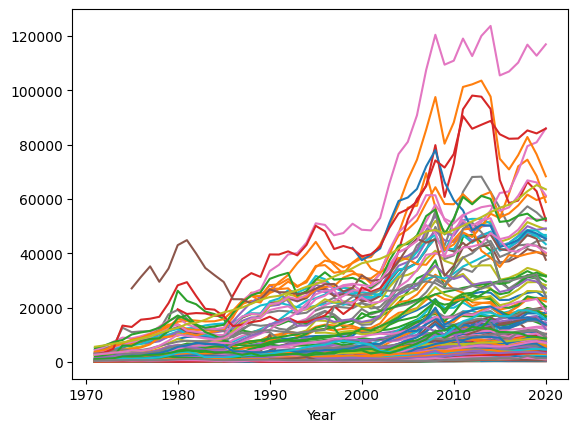

In [13]:
graph_countries = dfg.groupby(['Country_Name', 'Year'])['GDP_Per_Cap'] \
                             .min().unstack('Country_Name') \
                             .plot(kind='line', legend=False)


# rename and melt Life Exp (dfl)

In [14]:
dissimilar_names(df, dfl, 'Country_Name')

['Brunei',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'East Timor',
 'Egypt',
 'Falkland Islands',
 'Gambia',
 'Guinea Bissau',
 'Iran',
 'Ivory Coast',
 'Kyrgyzstan',
 'Laos',
 'Macedonia',
 'Republic of Serbia',
 'Republic of the Congo',
 'Russia',
 'Slovakia',
 'South Korea',
 'Swaziland',
 'Syria',
 'Taiwan',
 'The Bahamas',
 'Turkey',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela',
 'Vietnam',
 'West Bank',
 'Yemen']

In [15]:
#renaming countries to match prior dataset

country_rename = {
  'Brunei Darussalam':'Brunei',
  'Czechia':'Czech Republic',
  'Congo, Dem. Rep.':'Democratic Republic of the Congo',
  'Timor-Leste':'East Timor',
  'Egypt, Arab Rep.':'Egypt',
  'Gambia, The':'Gambia',
  'Guinea-Bissau':'Guinea Bissau',
  'Iran, Islamic Rep.':'Iran',
  "Cote d'Ivoire":'Ivory Coast',
  'Kyrgyz Republic':'Kyrgyzstan',
  'Lao PDR':'Laos',
  'North Macedonia':'Macedonia',
  'Serbia':'Republic of Serbia',
  'Congo, Rep.':'Republic of the Congo',
  'Russian Federation':'Russia',
  'Slovak Republic':'Slovakia',
  'Korea, Rep.':'South Korea',
  'Eswatini':'Swaziland',
  'Syrian Arab Republic':'Syria',
  'Bahamas, The':'The Bahamas',
  'Turkiye':'Turkey',
  'Tanzania':'United Republic of Tanzania',
  'United States':'United States of America',
  'Venezuela, RB':'Venezuela',
  'Viet Nam':'Vietnam',
  'West Bank and Gaza':'West Bank',
  'Yemen, Rep.':'Yemen'}





dfl['Country_Name'] = dfl['Country_Name'].map(country_rename).fillna(dfl['Country_Name'])


#create list of not similar countries *DF COUNTRIES*
dissimilar_names(df, dfl, 'Country_Name')

['Falkland Islands', 'Taiwan']

In [16]:
dfl = melt_df(dfl, 'Life_Exp')
dfl.head()

,Country_Name,Year,Life_Exp
0,Afghanistan,1971.0,37.923
1,Afghanistan,1972.0,38.444
2,Afghanistan,1973.0,39.003
3,Afghanistan,1974.0,39.550
4,Afghanistan,1975.0,40.100


# rename and melt Population (dfp)

In [17]:
dissimilar_names(df, dfp, 'Country_Name')

['Brunei',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'East Timor',
 'Egypt',
 'Falkland Islands',
 'Gambia',
 'Guinea Bissau',
 'Iran',
 'Ivory Coast',
 'Kyrgyzstan',
 'Laos',
 'Macedonia',
 'Republic of Serbia',
 'Republic of the Congo',
 'Russia',
 'Slovakia',
 'South Korea',
 'Swaziland',
 'Syria',
 'Taiwan',
 'The Bahamas',
 'Turkey',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela',
 'Vietnam',
 'West Bank',
 'Yemen']

In [18]:
#renaming countries to match prior dataset

country_rename = {
  'Brunei Darussalam':'Brunei',
  'Czechia':'Czech Republic',
  'Congo, Dem. Rep.':'Democratic Republic of the Congo',
  'Timor-Leste':'East Timor',
  'Egypt, Arab Rep.':'Egypt',
  'Gambia, The':'Gambia',
  'Guinea-Bissau':'Guinea Bissau',
  'Iran, Islamic Rep.':'Iran',
  "Cote d'Ivoire":'Ivory Coast',
  'Kyrgyz Republic':'Kyrgyzstan',
  'Lao PDR':'Laos',
  'North Macedonia':'Macedonia',
  'Serbia':'Republic of Serbia',
  'Congo, Rep.':'Republic of the Congo',
  'Russian Federation':'Russia',
  'Slovak Republic':'Slovakia',
  'Korea, Rep.':'South Korea',
  'Eswatini':'Swaziland',
  'Syrian Arab Republic':'Syria',
  'Bahamas, The':'The Bahamas',
  'Turkiye':'Turkey',
  'Tanzania':'United Republic of Tanzania',
  'United States':'United States of America',
  'Venezuela, RB':'Venezuela',
  'Viet Nam':'Vietnam',
  'West Bank and Gaza':'West Bank',
  'Yemen, Rep.':'Yemen'}





dfp['Country_Name'] = dfp['Country_Name'].map(country_rename).fillna(dfp['Country_Name'])


#create list of not similar countries *DF COUNTRIES*
dissimilar_names(df, dfp, 'Country_Name')

['Falkland Islands', 'Taiwan']

In [19]:
dfp = melt_df(dfp, 'Population')
dfp.head()

,Country_Name,Year,Population
0,Afghanistan,1971.0,11015857.0
1,Afghanistan,1972.0,11286753.0
2,Afghanistan,1973.0,11575305.0
3,Afghanistan,1974.0,11869879.0
4,Afghanistan,1975.0,12157386.0


# merge new data to old df

In [20]:
#merge df with (dfg, dfl, dfp)
df_fixed = pd.merge(df, dfg, on=['Country_Name', 'Year'], how='left', indicator='g')
df_fixed = pd.merge(df_fixed, dfl, on=['Country_Name', 'Year'], how='left', indicator='l')
df_fixed = pd.merge(df_fixed, dfp, on=['Country_Name', 'Year'], how='left', indicator='p')

df_fixed.head()

,Country_Id,Country_Name,Year,GDP_Growth,Index_1971,Index_2020,Fifty_Year_Change,Region,Income_Group,Question_Category,Question,Index_Score,2020_Data_Rank,2020_1GB_Price(USD),Life_Exp_x,Population_x,GDP_Per_Cap_x,Avg_WEI_Score,k_clusters,GDP_Per_Cap_y,g,Life_Exp_y,l,Population_y,p
0,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Does the law provide for the valuation of nonm...,0.0,59.0,1.55,36.088,13079460.0,739.981106,6.288571,1,141.365322,both,38.444,both,11286753.0,both
1,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do female and male surviving spouses have equa...,0.0,59.0,1.55,36.088,13079460.0,739.981106,6.288571,1,141.365322,both,38.444,both,11286753.0,both
2,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do men and women have equal ownership rights t...,20.0,59.0,1.55,36.088,13079460.0,739.981106,6.288571,1,141.365322,both,38.444,both,11286753.0,both
3,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do sons and daughters have equal rights to inh...,0.0,59.0,1.55,36.088,13079460.0,739.981106,6.288571,1,141.365322,both,38.444,both,11286753.0,both
4,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Does the law grant spouses equal administrativ...,20.0,59.0,1.55,36.088,13079460.0,739.981106,6.288571,1,141.365322,both,38.444,both,11286753.0,both


In [21]:
df_fixed[['g', 'l', 'p']].value_counts()

g          l          p        
both       both       both         322420
left_only  left_only  left_only      3430
dtype: int64

In [22]:
df_fixed.query('l == "left_only"')['Country_Name'].unique()

array(['Falkland Islands', 'Taiwan'], dtype=object)

In [23]:
df_fixed = df_fixed.drop(columns=['GDP_Per_Cap_x', 'g', 'Life_Exp_x', 'l', 'Population_x', 'p'], axis=1) \
                    .rename(columns={'GDP_Per_Cap_y':'GDP_Per_Cap', 'Life_Exp_y':'Life_Exp', 'Population_y':'Population'})
df_fixed.head()

,Country_Id,Country_Name,Year,GDP_Growth,Index_1971,Index_2020,Fifty_Year_Change,Region,Income_Group,Question_Category,Question,Index_Score,2020_Data_Rank,2020_1GB_Price(USD),Avg_WEI_Score,k_clusters,GDP_Per_Cap,Life_Exp,Population
0,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Does the law provide for the valuation of nonm...,0.0,59.0,1.55,6.288571,1,141.365322,38.444,11286753.0
1,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do female and male surviving spouses have equa...,0.0,59.0,1.55,6.288571,1,141.365322,38.444,11286753.0
2,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do men and women have equal ownership rights t...,20.0,59.0,1.55,6.288571,1,141.365322,38.444,11286753.0
3,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do sons and daughters have equal rights to inh...,0.0,59.0,1.55,6.288571,1,141.365322,38.444,11286753.0
4,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Does the law grant spouses equal administrativ...,20.0,59.0,1.55,6.288571,1,141.365322,38.444,11286753.0


In [24]:
df_fixed.dtypes

Country_Id               int64
Country_Name            object
Year                     int64
GDP_Growth             float64
Index_1971             float64
Index_2020             float64
Fifty_Year_Change      float64
Region                  object
Income_Group            object
Question_Category       object
Question                object
Index_Score            float64
2020_Data_Rank         float64
2020_1GB_Price(USD)    float64
Avg_WEI_Score          float64
k_clusters               int64
GDP_Per_Cap            float64
Life_Exp               float64
Population             float64
dtype: object

In [25]:
df_fixed[['Life_Exp', 'Avg_WEI_Score', 'GDP_Per_Cap']] = df_fixed[['Life_Exp', 'Avg_WEI_Score', 'GDP_Per_Cap']].astype('float64') \
                                                         .round(2)

df_fixed.head()

,Country_Id,Country_Name,Year,GDP_Growth,Index_1971,Index_2020,Fifty_Year_Change,Region,Income_Group,Question_Category,Question,Index_Score,2020_Data_Rank,2020_1GB_Price(USD),Avg_WEI_Score,k_clusters,GDP_Per_Cap,Life_Exp,Population
0,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Does the law provide for the valuation of nonm...,0.0,59.0,1.55,6.29,1,141.37,38.44,11286753.0
1,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do female and male surviving spouses have equa...,0.0,59.0,1.55,6.29,1,141.37,38.44,11286753.0
2,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do men and women have equal ownership rights t...,20.0,59.0,1.55,6.29,1,141.37,38.44,11286753.0
3,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do sons and daughters have equal rights to inh...,0.0,59.0,1.55,6.29,1,141.37,38.44,11286753.0
4,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Does the law grant spouses equal administrativ...,20.0,59.0,1.55,6.29,1,141.37,38.44,11286753.0


In [26]:
#groupby total index score
df_plot = df_fixed.groupby(['Country_Name', 'Year', 'Life_Exp', 'Population', 'GDP_Per_Cap', 'k_clusters'])['Index_Score'] \
                  .sum() \
                  .reset_index()

df_plot.head()

,Country_Name,Year,Life_Exp,Population,GDP_Per_Cap,k_clusters,Index_Score
0,Afghanistan,1972,38.44,11286753.0,141.37,1,210.0
1,Afghanistan,1973,39.00,11575305.0,149.74,1,210.0
2,Afghanistan,1974,39.55,11869879.0,181.60,1,210.0
3,Afghanistan,1975,40.10,12157386.0,194.67,1,210.0
4,Afghanistan,1976,40.65,12425267.0,205.67,1,210.0


In [27]:
df_plot.dtypes

Country_Name     object
Year              int64
Life_Exp        float64
Population      float64
GDP_Per_Cap     float64
k_clusters        int64
Index_Score     float64
dtype: object

# Plot new data

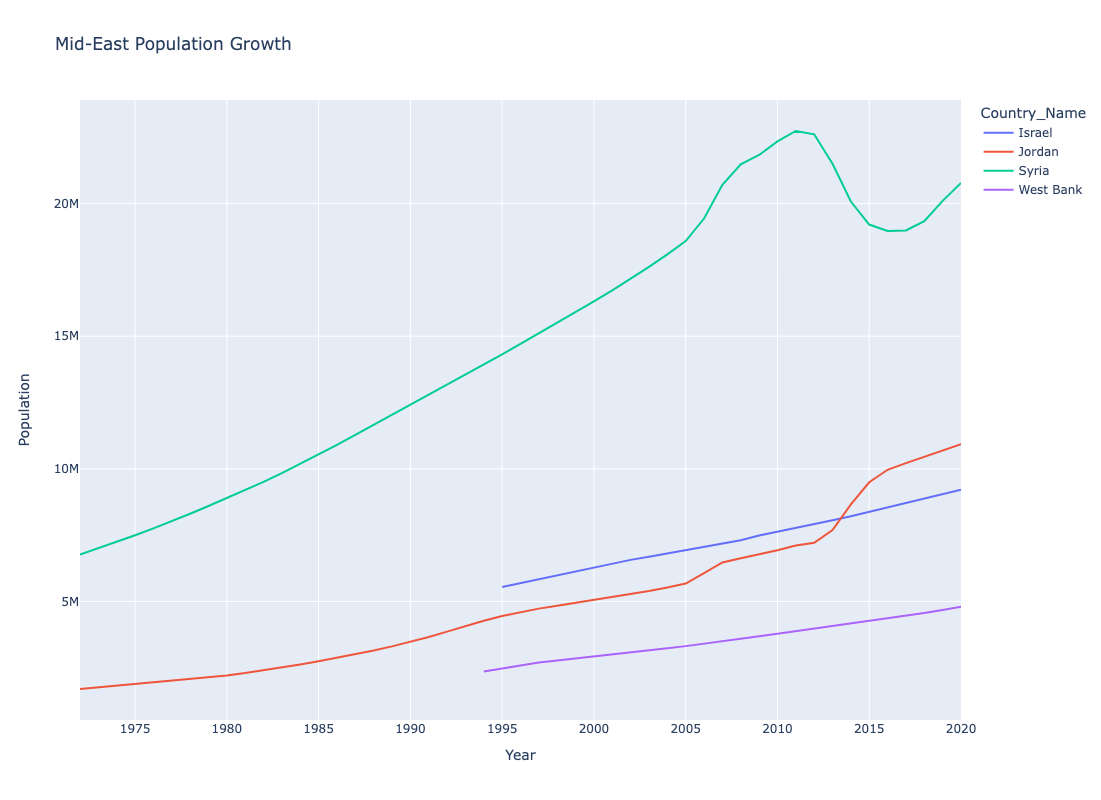

In [35]:
plot_gdp = px.line(df_plot.query('Country_Name.isin(["West Bank", "Israel", "Jordan", "Syria"])'), 'Year', 'Population', 
                   color='Country_Name', width=800, height=800, title='Mid-East Population Growth')
plot_gdp.show()

In [37]:
# # df_plot = df_plot.sort_values(by=['Year', 'Country_Name'], ascending=True)

# plot = px.scatter(
#     df_fixed,
#     x='Life_Exp',
#     y='GDP_Per_Cap',
#     color='k_clusters',
#     size='Population',
#     animation_frame='Year',
#     hover_name='Country_Name',
#     width=800,
#     height=800
# )

# plot.show()


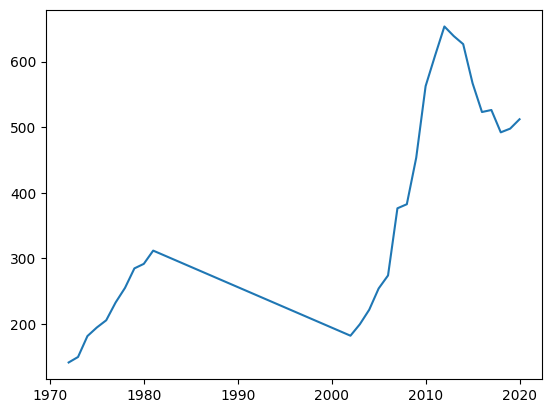

In [38]:
plt.plot(df_plot.query('Country_Name == "Afghanistan"')['Year'],
         df_plot.query('Country_Name == "Afghanistan"')['GDP_Per_Cap'])

# export

In [39]:
#df_fixed.to_csv(os.path.join(path, '2 Data', 'Clean_Data', '1_4_24_WEI.csv'))

In [40]:
df_fixed.isna().sum()

Country_Id                 0
Country_Name               0
Year                       0
GDP_Growth                 0
Index_1971                 0
Index_2020                 0
Fifty_Year_Change          0
Region                     0
Income_Group               0
Question_Category          0
Question                   0
Index_Score                0
2020_Data_Rank             0
2020_1GB_Price(USD)        0
Avg_WEI_Score              0
k_clusters                 0
GDP_Per_Cap            46865
Life_Exp                7630
Population              4060
dtype: int64

In [41]:
df_fixed.shape

(325850, 19)

In [75]:
#check k clusters
pd.set_option('display.max_rows', None)
kcluck = df_fixed.groupby('k_clusters')['Country_Name'].agg(lambda x: set(x))

for cluster, names in enumerate(kcluck):
    print(f'cluster {cluster}:\n {names}\n')


cluster 0:
 {'Canada', 'Slovenia', 'Czech Republic', 'Japan', 'Singapore', 'Portugal', 'Spain', 'Italy', 'Slovakia', 'Greece', 'New Zealand', 'France', 'United States of America', 'United Kingdom', 'Kuwait', 'Hungary', 'Israel', 'Iceland', 'Austria', 'Poland', 'Ireland', 'Germany', 'Uruguay', 'Sweden', 'Australia', 'Croatia', 'Belgium', 'Netherlands', 'Finland', 'Norway', 'South Korea', 'Denmark'}

cluster 1:
 {'Mali', 'Sudan', 'Brazil', 'Madagascar', 'Equatorial Guinea', 'Mauritania', 'Pakistan', 'West Bank', 'Gabon', 'Egypt', 'Rwanda', 'Sierra Leone', 'Argentina', 'Senegal', 'India', 'Cabo Verde', 'Cambodia', 'Iraq', 'Saudi Arabia', 'Swaziland', 'Bangladesh', 'Cameroon', 'Lebanon', 'Haiti', 'Lesotho', 'Eritrea', 'Indonesia', 'Nigeria', 'Guinea Bissau', 'Democratic Republic of the Congo', 'Falkland Islands', 'United Republic of Tanzania', 'Angola', 'Liberia', 'Kenya', 'Bahrain', 'Benin', 'Somalia', 'Zambia', 'Malawi', 'United Arab Emirates', 'Nepal', 'Bolivia', 'Algeria', 'Zimbabwe', 